In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode
import seaborn as sns
import os
import scipy.stats as st 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
df = pd.read_csv('titanic-passengers.csv', header='infer',delimiter=';')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.Age = df.Age.fillna(df.Age.mean())

In [7]:
liste = df.Cabin
liste = liste.dropna()
mode(liste)
df.Cabin = df.Cabin.fillna(mode(liste))

In [8]:
df.Embarked = df.Embarked.fillna(mode(df.Embarked))

In [9]:
df.isnull().values.any()

False

In [142]:
def plot_correlation_map( df ):

    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) ) 
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True ) 
    s = sns.heatmap( 
        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 

        annot = True, 
        annot_kws = { 'fontsize' : 12 }

        )

In [10]:
df.drop(['Name','PassengerId'],axis=1,inplace=True)

In [11]:
temporary = pd.read_csv('titanic-passengers.csv', header='infer',delimiter=';')

In [12]:
df['Title'] = temporary['Name'].str.extract(' ([A-Za-z]+).', expand=False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    object 
 9   Embarked  891 non-null    object 
 10  Title     891 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 76.7+ KB


In [14]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Dr', 'Major', 'Don', 'Master', 'Rev', 'Col',
       'Impe', 'Mlle', 'Planke', 'Mulder', 'Melkebeke', 'Cruyssen',
       'Gordon', 'y', 'Carlo', 'Steen', 'Jonkheer', 'der', 'Pelsmaeker',
       'Mme', 'Billiard', 'Messemaeker', 'Capt', 'Shawah', 'Walle', 'the',
       'Ms', 'Velde'], dtype=object)

In [15]:
label_encoder = preprocessing.LabelEncoder()
df['Embarked']= label_encoder.fit_transform(df['Embarked']) #S =2 C =0 Q =1 

In [16]:
label_encoder = preprocessing.LabelEncoder()
df['Title']= label_encoder.fit_transform(df['Title'])
df.Title.unique()

array([17, 18, 14,  6, 10,  5, 11, 23,  3,  8, 15, 22, 20, 12,  4,  7, 30,
        2, 25,  9, 28, 21, 16,  0, 13,  1, 24, 27, 29, 19, 26])

In [17]:
label_encoder = preprocessing.LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])#male=1   female=0

In [18]:
label_encoder = preprocessing.LabelEncoder()
df['Survived']= label_encoder.fit_transform(df['Survived'])#No=0  Yes=1

In [19]:
Title_Dictionary = {17 : 1, 18 : 2, 14 : 3,  6 : 5, 10 : 5,  5 : 5, 11 : 4, 23 : 5,  3 : 5,  8 : 5,
                    15 : 3, 22 : 5, 20 : 5, 12 : 5,  4 : 5,  7 : 5, 30 : 5,2 : 5, 25 : 5,  9 : 5, 
                    28 : 5, 21 : 5, 16 : 3,  0 : 5, 13 : 5,  1 : 5, 24 : 5, 27 : 5, 29 : 5, 19 : 3, 26 : 5  }
df.Title.replace(Title_Dictionary, inplace=True)
#1 Mr 2 Mrs 3 Miss 4  Master 5 the rest

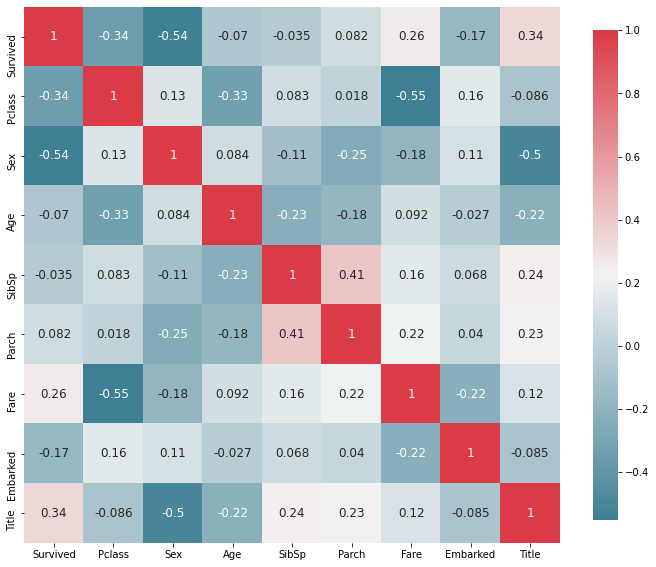

In [154]:
plot_correlation_map(df)

In [20]:
df["FamilySize"]=df["SibSp"]+df["Parch"]

In [21]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,0,2,1,28.0,0,0,248740,13.00,G6,2,1,0
1,0,3,1,25.0,0,0,348123,7.65,F G73,2,1,0


In [ ]:
# cat_columns = ["Survived","Pclass","Sex","Embarked","Title","Cabin",]
# df[cat_columns]=df[cat_columns].astype("category")

In [21]:
x=df.drop(["Survived", "Cabin", "Ticket", "Embarked","SibSp","Parch"], axis=1)
y= df["Survived"]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

In [24]:
#applying tree algorithm
model = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)  
model.fit(x_train, y_train)   #fitting our model
y_pred=model.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8379888268156425


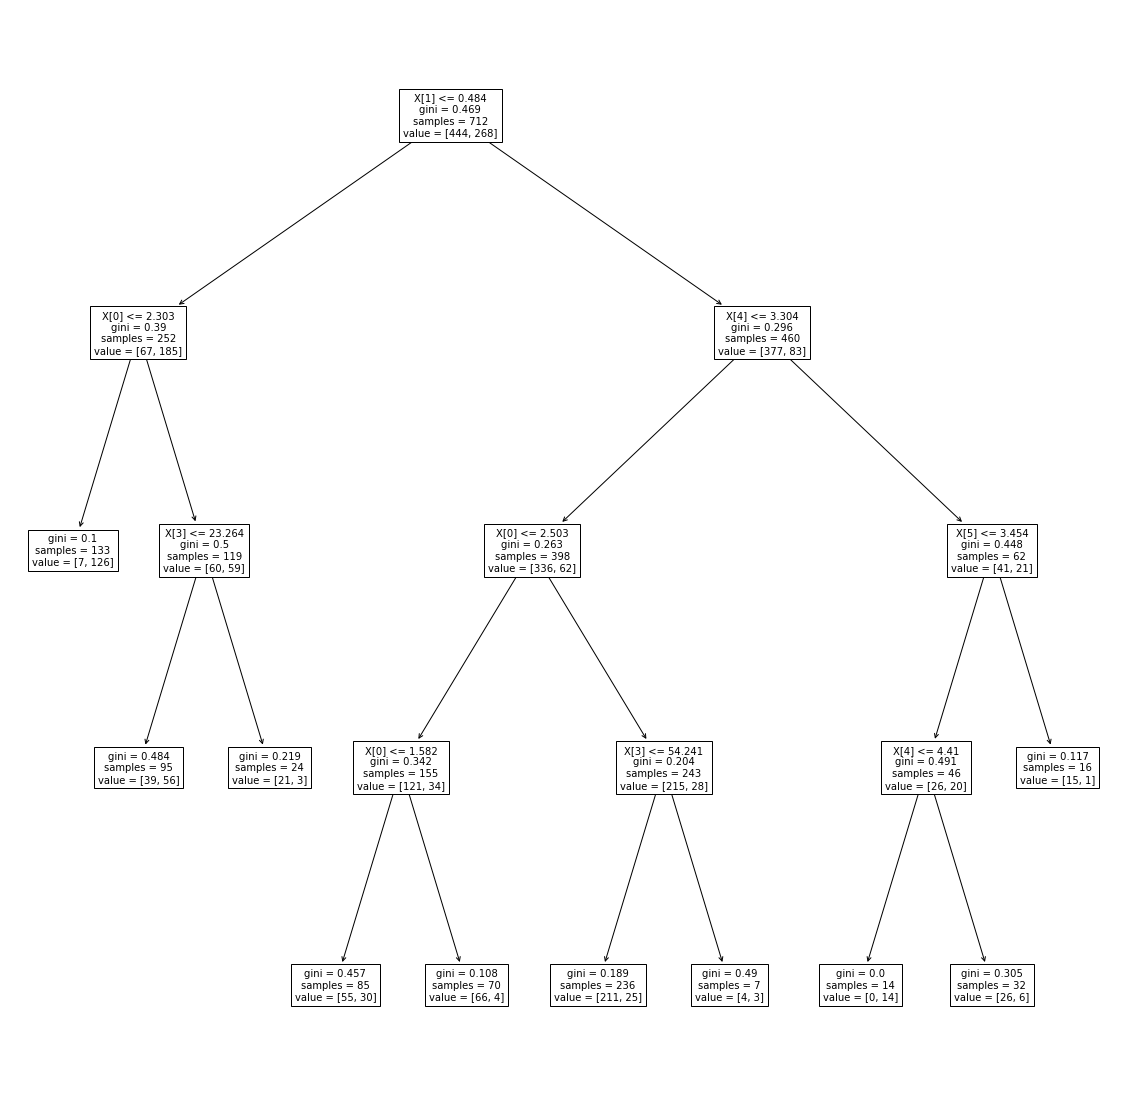

In [26]:
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(model, fontsize=10)
plt.show() 